In [2]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
## Finding Duplicate Image and Removal

In [31]:
import os
import hashlib
from PIL import Image

# Function to calculate the hash of an image
def calculate_hash(image_path):
    with Image.open(image_path) as img:
        # Convert image to a consistent format (e.g., RGB)
        img = img.convert('RGB')
        # Resize to a smaller size (optional) for faster hashing, e.g., 8x8
        img = img.resize((64, 64))
        # Get image data
        image_data = img.tobytes()
        # Return the hash of the image
        return hashlib.md5(image_data).hexdigest()

# Path to the directory containing images
image_dir = 'D:\\movie-recommendation-system\\Emotion_detection\\data\\train'

# Dictionary to store image hashes
hashes = {}
duplicates = []

# Walk through the image directory
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png', 'bmp')):
            image_path = os.path.join(root, file)
            # Calculate hash
            image_hash = calculate_hash(image_path)
            # Check if hash already exists
            if image_hash in hashes:
                print(f"Duplicate found: {image_path} is a duplicate of {hashes[image_hash]}")
                duplicates.append(image_path)  # Collect duplicate file paths
            else:
                hashes[image_hash] = image_path

# Optionally delete duplicate images
for duplicate in duplicates:
    os.remove(duplicate)
    print(f"Deleted: {duplicate}")


Duplicate found: D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_12775696.jpg is a duplicate of D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_11860503.jpg
Duplicate found: D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_18699711.jpg is a duplicate of D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_16527960.jpg
Duplicate found: D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_19321092.jpg is a duplicate of D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_1886687.jpg
Duplicate found: D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_20374852.jpg is a duplicate of D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_17427197.jpg
Duplicate found: D:\movie-recommendation-system\Emotion_detection\data\train\angry\Training_24299949.jpg is a duplicate of D:\movie-recommendation-system\Emo

In [ ]:
## Outlier Detection and Removal

In [42]:
import os
from PIL import Image
import numpy as np

# List to store corrupted or blank images
corrupted_images = []

# Base path to image directory
base_dir = 'D:\\movie-recommendation-system\\Emotion_detection\\data\\train'

# Loop through each subdirectory (angry, disgust, etc.)
for subdir in os.listdir(base_dir):
    subdir_path = os.path.join(base_dir, subdir)
    if os.path.isdir(subdir_path):
        # Loop through each image in the subdirectory
        for filename in os.listdir(subdir_path):
            filepath = os.path.join(subdir_path, filename)
            try:
                # Open and check the image
                img = Image.open(filepath).convert('L')  # Convert to grayscale
                img_array = np.array(img)
                
                # Check if the image is blank (all pixels are the same)
                if np.std(img_array) == 0:
                    corrupted_images.append(filepath)
                    print(f"Blank image detected: {filepath}")
                    os.remove(filepath)  # Delete the blank image
                    print(f"Deleted {filepath}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")
                corrupted_images.append(filepath)
                os.remove(filepath)  # Delete the corrupted image
                print(f"Deleted {filepath}")

print("Corrupted or blank images removed:", corrupted_images)


Corrupted or blank images removed: []


In [ ]:
## Normalizing The Images

In [39]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,   ## rescale or normalize the images pixels, by dividing them 255
    shear_range = 0.2,  ## angle for slant of image in degrees
    zoom_range = 0.1,   ## for zoom in or out
    horizontal_flip = True 
)
X_train = train_datagen.flow_from_directory(
    'D:\\movie-recommendation-system\\Emotion_detection\\data\\train',   ## give path of training set
    target_size=(48,48),      ## target_size of image in which you want
    batch_size=32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 27472 images belonging to 7 classes.


In [40]:
test_datagen = ImageDataGenerator(rescale=1./255)
X_test = test_datagen.flow_from_directory(
    'D:\\movie-recommendation-system\\Emotion_detection\\data\\test',
    target_size = (48,48),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


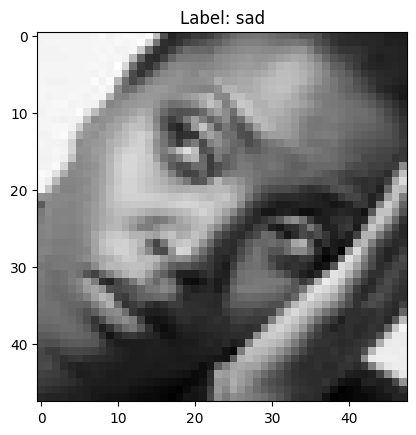

In [77]:
# Getting the first batch of images and labels
images, labels = X_train.next()

# Map class indices to class labels
class_labels = {v: k for k, v in X_train.class_indices.items()}

# Find the class label from the one-hot encoded label
import numpy as np

# Example: Display the first image and its corresponding label name
image_index = 0  # Index of the image in the batch
label_index = np.argmax(labels[image_index])  # Convert one-hot encoded label to index
label_name = class_labels[label_index]  # Get the label name from the index

# Display the image with label
import matplotlib.pyplot as plt

plt.imshow(images[image_index].reshape(48, 48), cmap='gray')  # Reshaping to 2D if grayscale
plt.title(f"Label: {label_name}")
plt.show()
